D:\anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


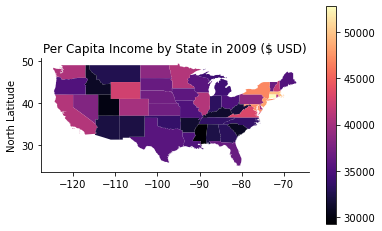

In [1]:
# pysal version == 2.0.0
# Q1: Create a choropleth map.
#!pip install pysal==2.2.0

import pandas as pd
import geopandas as gpd
import numpy as np
import pysal
import matplotlib.pyplot as plt
import palettable.matplotlib as palmpl

us_income = pd.read_csv(pysal.lib.examples.get_path("usjoin.csv"))
us_income_shape = gpd.read_file(pysal.lib.examples.get_path("us48.shp"))
us_shape_income = pd.merge(left=us_income_shape, right=us_income, left_on="STATE_NAME", right_on="Name")

f,ax = plt.subplots()
ax = us_shape_income.plot("2009", ax=ax, legend=True, cmap = 'magma')

ax.set_title('Per Capita Income by State in 2009 ($ USD)')
ax.set_ylabel('North Latitude')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


Text(93.25, 0.5, 'North Latitude')

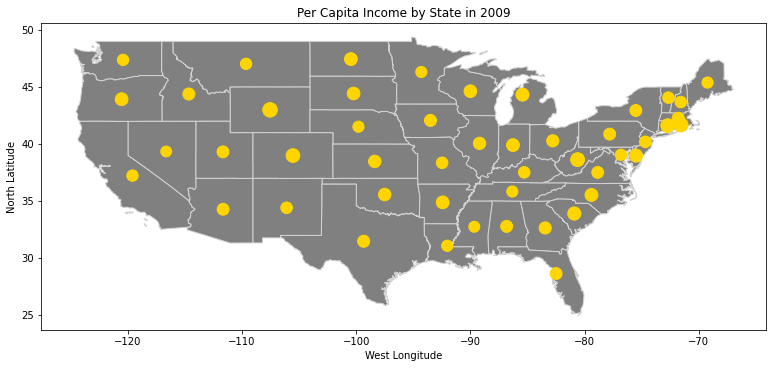

In [2]:
# Q2: Create a proportional symbol map.

us_income_shape['centroid_col'] = us_income_shape.centroid
us_income_shape['income'] = np.array(us_income['2009'])

centroids = list(us_income_shape['centroid_col'])
for_plot = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))],
                   'x':[centroids[i].x for i in range(len(centroids))],
                   'data':list(us_income_shape['income'])})

f,base = plt.subplots(figsize=(13,13))
base = us_income_shape.plot(edgecolor='lightgray',facecolor='gray', ax=base)
base = for_plot.plot(kind='scatter',x='x', y='y',s=for_plot['data']/250, ax=base, color='#ffd500', legend=True)
base.set_title('Per Capita Income by State in 2009')
base.set_xlabel('West Longitude')
base.set_ylabel('North Latitude')

In [3]:
#!pip install libpysal==4.2.1

In [4]:
# libpysal version == 4.2.1
# Q3: Compute the value of Moran's I for the per capita income of each US state in 2009 using Rook Continuity. 

from libpysal.weights import Rook
import libpysal
y = np.array(us_income['2009'])
w = Rook.from_shapefile(pysal.lib.examples.get_path('us48.shp'))

mi = pysal.explore.esda.Moran(y, w, two_tailed=False)
print(round(mi.I,4))

0.0407
